# WordCloud
Author: LUO Qingyun

In [1]:
import collections
import wordcloud
import matplotlib.pyplot as plt
import operator
from functools import reduce
from imageio import imread
import pandas as pd
import numpy as np

from data_selectors import *

In [2]:
twi_mask=imread("img/twitter.png")
word_counts_top10_twitter={}
def twicloud(words,title):
  word_counts=collections.Counter(words.split(" "))
  del word_counts["commod"]
  del word_counts["soybean"]
  del word_counts["corn"]
  del word_counts["wheat"]
  word_counts_top10 = word_counts.most_common(10)
  word_counts_top10_twitter[title]=word_counts_top10
  wc=wordcloud.WordCloud(font_path="times.ttf",max_words=200,background_color="white",max_font_size=100,mask=twi_mask)
  wc.generate_from_frequencies(word_counts)
  image_colors = wordcloud.ImageColorGenerator(twi_mask)
  wc.recolor(color_func=image_colors)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(title)
  wc.to_file(f"{title}_twitter.jpg")
  plt.show()

In [3]:
news_mask=imread("img/news.jpg")
word_counts_top10_news={}
def newcloud(words,title):
  word_counts=collections.Counter(words.split(" "),)
  del word_counts["commod"]
  del word_counts["soybean"]
  del word_counts["corn"]
  del word_counts["wheat"]
  word_counts_top10=word_counts.most_common(10)
  word_counts_top10_news[title]=word_counts_top10
  wc=wordcloud.WordCloud(font_path="data/times.ttf",max_words=200,background_color="white",max_font_size=100,mask=news_mask)
  wc.generate_from_frequencies(word_counts)
  image_colors = wordcloud.ImageColorGenerator(news_mask)
  wc.recolor(color_func=image_colors)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(title)
  wc.to_file(f"{title}_news.jpg")
  plt.show()

C:\Users\Claude\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


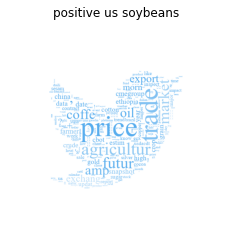

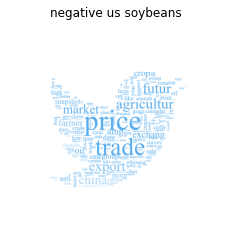

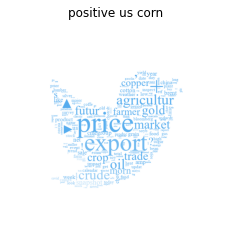

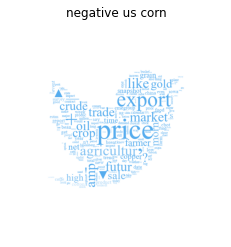

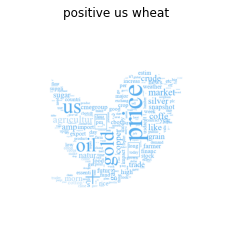

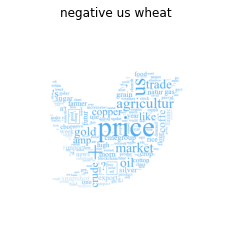

{'positive us soybeans': [('price', 1416), ('trade', 1224), ('agricultur', 1136), ('futur', 910), ('market', 908), ('’', 722), ('coffe', 703), ('amp', 698), ('oil', 682), ('export', 632)], 'negative us soybeans': [('price', 1160), ('trade', 860), ('agricultur', 803), ('futur', 789), ('export', 716), ('—', 610), ('china', 578), ('market', 567), ('exchang', 459), ('+', 458)], 'positive us corn': [('price', 1859), ('export', 1346), ('+', 1295), ('agricultur', 1266), ('’', 1225), ('oil', 1179), ('crude', 1134), ('▲', 938), ('—', 935), ('gold', 927)], 'negative us corn': [('price', 2356), ('’', 1348), ('+', 1230), ('export', 1181), ('agricultur', 1077), ('like', 1023), ('amp', 1002), ('futur', 976), ('market', 975), ('trade', 906)], 'positive us wheat': [('price', 2084), ('+', 1874), ('📈', 1471), ('📉', 1364), ('us', 1057), ('oil', 909), ('gold', 891), ('agricultur', 852), ('market', 783), ('coffe', 676)], 'negative us wheat': [('price', 2463), ('+', 2240), ('📈', 1569), ('📉', 1302), ('us', 1

In [4]:
twi_dict={}
for grain in ("us soybeans","us corn","us wheat"):
    twi_df=data_selector_tweet(grain, "2020-01-01", "2020-11-30")
    twi_dict[f"positive {grain}"]=twi_df.loc[twi_df[f"{grain}_trend_next"]==1.0]
    twi_dict[f"negative {grain}"]=twi_df.loc[twi_df[f"{grain}_trend_next"]==-1.0]
for grain in twi_dict.keys():
    twi_allwords=reduce(operator.add, twi_dict[grain]["words"], "")
    twicloud(twi_allwords,grain)
print(word_counts_top10_twitter)

99 rows of data are selected.
58 rows of data are selected.
183 rows of data are selected.


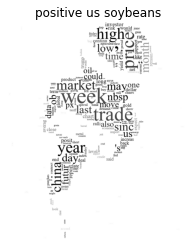

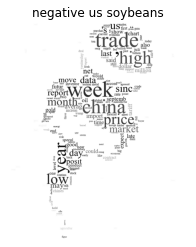

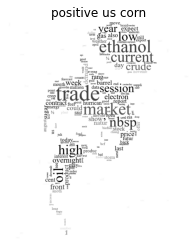

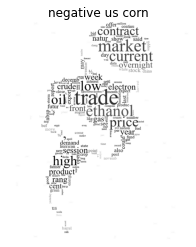

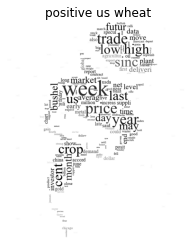

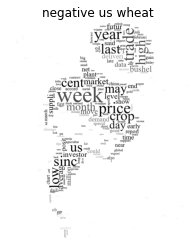

{'positive us soybeans': [('week', 441), ('’', 393), ('trade', 344), ('price', 305), ('year', 289), ('high', 281), ('market', 260), ('china', 255), ('sinc', 194), ('month', 186)], 'negative us soybeans': [('week', 230), ('trade', 219), ('’', 191), ('china', 186), ('high', 150), ('year', 142), ('price', 138), ('low', 131), ('month', 130), ('us', 125)], 'positive us corn': [('trade', 195), ('ethanol', 118), ('market', 110), ('current', 103), ('nbsp', 94), ('oil', 89), ('high', 86), ('low', 78), ('session', 77), ('crude', 73)], 'negative us corn': [('trade', 205), ('market', 115), ('ethanol', 101), ('’', 96), ('current', 92), ('price', 78), ('low', 74), ('oil', 73), ('high', 71), ('contract', 65)], 'positive us wheat': [('week', 820), ('price', 359), ('trade', 335), ('year', 330), ('sinc', 297), ('crop', 277), ('cent', 265), ('high', 265), ('us', 255), ('last', 252)], 'negative us wheat': [('week', 977), ('trade', 493), ('price', 450), ('year', 449), ('sinc', 371), ('crop', 345), ('high',

In [5]:
new_dict={}
for grain in ("us soybeans","us corn","us wheat"):
    new_df=data_selector_news(grain,1)
    new_dict[f"positive {grain}"]=new_df.loc[new_df[f"{grain}_close_trend"]==1.0]
    new_dict[f"negative {grain}"]=new_df.loc[new_df[f"{grain}_close_trend"]==-1.0]
for grain in new_dict.keys():
    new_allwords=reduce(operator.add, new_dict[grain]["words"], "")
    newcloud(new_allwords,grain)
print(word_counts_top10_news)